In [62]:

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import os


In [63]:
# chargement des données et localisation du fichier train.csv automatiquement
base_dir = os.path.dirname(os.getcwd())  # monte d’un niveau
csv_path = os.path.join(base_dir, "Data", "processed", "metro_complet.csv")

# chargement du fichier CSV
df = pd.read_csv(csv_path)
df = df[df['Niveau de pollution'] != 'pas de données']

In [64]:

ligne_selector = widgets.Dropdown(
    options=["Toutes"] + sorted(df["Nom de la ligne"].unique()),
    description='Ligne:',
    value="Toutes"
)

def afficher_carte(ligne):
    if ligne == "Toutes":
        filtered = df
    else:
        filtered = df[df["Nom de la ligne"] == ligne]

    color_discrete_map = {
        "FAIBLE": "green",
        "MOYENNE": "orange",
        "ELEVE": "red"
    }

    fig = px.scatter_mapbox(
        filtered,
        lat="stop_lat",
        lon="stop_lon",
        color="Niveau de pollution",
        hover_name="Nom de la Station",
        zoom=11,
        height=500,
        mapbox_style="carto-positron",
        title=f"Stations de métro - {ligne if ligne != 'Toutes' else 'Toutes lignes'}",
        color_discrete_map=color_discrete_map
    )
    fig.show()

widgets.interact(afficher_carte, ligne=ligne_selector)


interactive(children=(Dropdown(description='Ligne:', options=('Toutes', 'Métro 1', 'Métro 10', 'Métro 11', 'Mé…

<function __main__.afficher_carte(ligne)>

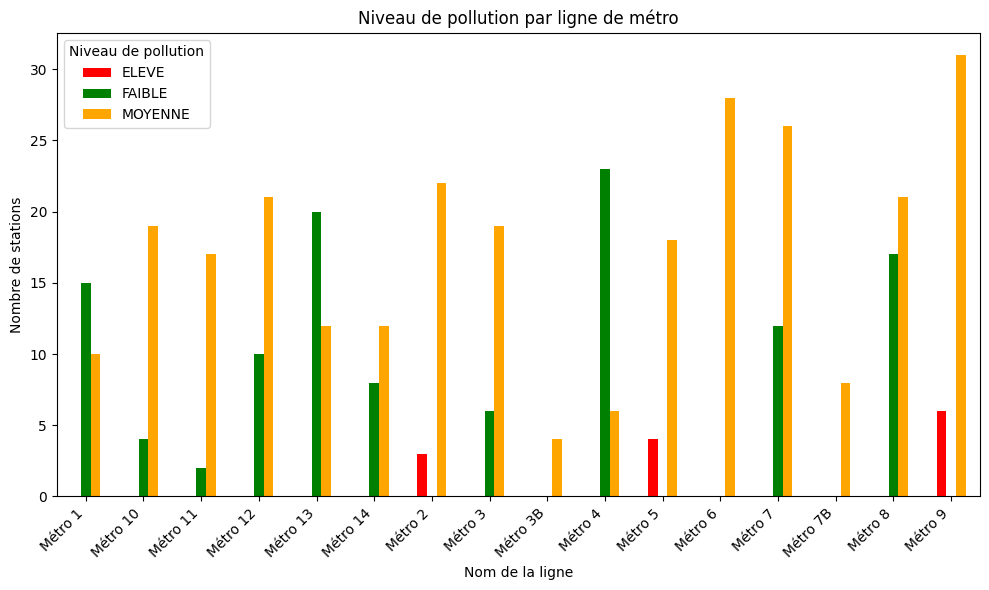

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Crée le dossier s’il n’existe pas
os.makedirs("../Data/graph", exist_ok=True)

# Regroupement
pollution_counts = df.groupby(["Nom de la ligne", "Niveau de pollution"]).size().reset_index(name='Nombre de stations')

# Pivot pour affichage groupé par barre
pivot_df = pollution_counts.pivot(index="Nom de la ligne", columns="Niveau de pollution", values="Nombre de stations").fillna(0)

# Couleurs personnalisées
couleurs = {
    "FAIBLE": "green",
    "MOYENNE": "orange",
    "ELEVE": "red"
}

# Création du graphique
pivot_df.plot(kind="bar", color=[couleurs[col] for col in pivot_df.columns], figsize=(10,6))

plt.title("Niveau de pollution par ligne de métro")
plt.xlabel("Nom de la ligne")
plt.ylabel("Nombre de stations")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Niveau de pollution")
plt.tight_layout()

# Sauvegarde
plt.savefig("../Data/graph/Niveau_de_pollution_par_metro.png")

# Affichage
plt.show()


In [66]:
import pandas as pd
import plotly.graph_objects as go

# Regrouper les données par station
grouped = df.groupby("Nom de la Station").agg({
    "Identifiant station": lambda x: ', '.join(sorted(set(x))),
    "Nom de la ligne": lambda x: ', '.join(sorted(set(x))),
    "Niveau de pollution": lambda x: ', '.join(sorted(set(x))),
    "stop_lon": "mean",
    "stop_lat": "mean"
}).reset_index()

# Créer un tableau interactif avec Plotly
fig = go.Figure(data=[go.Table(
    columnwidth=[80]*len(grouped.columns),
    header=dict(
        values=[f"<b>{col}</b>" for col in grouped.columns],
        fill_color='darkblue',
        font=dict(color='white', size=12),
        align='left'
    ),
    cells=dict(
        values=[grouped[col] for col in grouped.columns],
        fill_color='lavender',
        align='left',
        font=dict(size=11)
    )
)])

fig.update_layout(
    title="Tableau interactif des stations de métro regroupées",
    height=600
)

fig.show()


In [67]:
import os
import pandas as pd

# Recharger les données
base_dir = os.path.dirname(os.getcwd())
csv_path = os.path.join(base_dir, "Data", "processed", "metro_complet.csv")
df = pd.read_csv(csv_path)

# Ajouter une colonne numérique pour le niveau de pollution
pollution_mapping = {
    'FAIBLE': 1,
    'MOYENNE': 2,
    'ELEVE': 3,
}
df['pollution_num'] = df['Niveau de pollution'].map(pollution_mapping)

# Exporter vers un fichier CSV pour QGIS
cols = ['Nom de la Station', 'Nom de la ligne', 'Niveau de pollution', 'pollution_num', 'stop_lat', 'stop_lon']
df_export = df[cols]
output_path = os.path.join(base_dir, "Data", "processed", "stations_qgis.csv")
df_export.to_csv(output_path, index=False)
